# Project name: Lowering qubit requirements using binary codes in Google Quantum AI
# Contributor: Rajeev Singh Sisodiya
# Introduction
Molecular Hamiltonians are known to have certain symmetries that are not taken into account by mappings like the Jordan-Wigner or Bravyi-Kitaev transform. The most notable of such symmetries is the conservation of the total number of particles in the system. Since those symmetries effectively reduce the degrees of freedom of the system, one is able to reduce the number of qubits required for simulation by utilizing binary codes (arXiv:1712.07067).

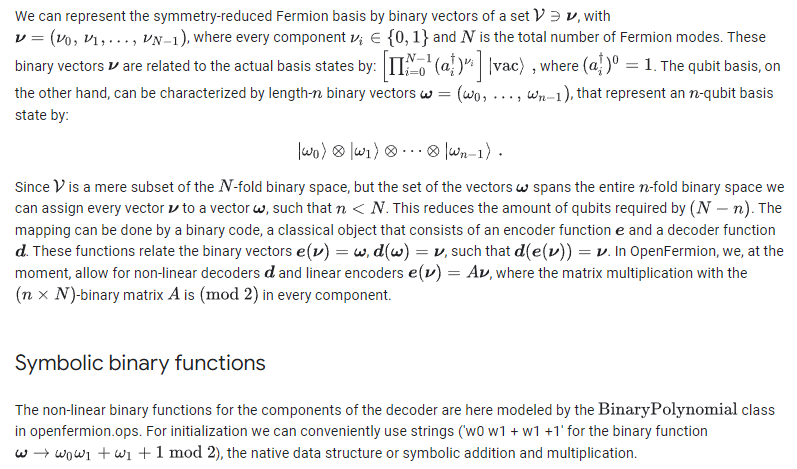



# Setup
Install the OpenFermion package:

In [ ]:
try:
    import openfermion
except ImportError:
    !pip install git+https://github.com/quantumlib/OpenFermion.git@master#egg=openfermion

In [2]:
from openfermion.ops import BinaryPolynomial

binary_1 = BinaryPolynomial('w0 w1 + w1 + 1')

print("These three expressions are equivalent: \n", binary_1)
print(BinaryPolynomial('w0') * BinaryPolynomial('w1 + 1') + BinaryPolynomial('1'))
print(BinaryPolynomial([(1, 0), (1, ), ('one', )]))

print('The native data type structure can be seen here:')
print(binary_1.terms)
print('We can always evaluate the expression for instance by the vector (w0, w1, w2) = (1, 0, 0):',
      binary_1.evaluate('100'))

These three expressions are equivalent: 
 [W0 W1] + [W1] + [1]
[W0 W1] + [W0] + [1]
[W0 W1] + [W1] + [1]
The native data type structure can be seen here:
[(0, 1), (1,), ('one',)]
We can always evaluate the expression for instance by the vector (w0, w1, w2) = (1, 0, 0): 1


# Binary codes
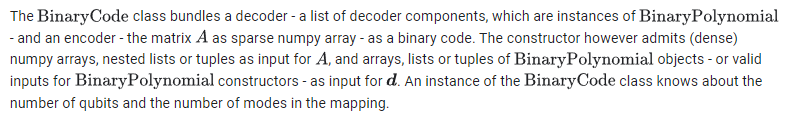

In [3]:
from openfermion.ops import BinaryCode

code_1 = BinaryCode([[1, 0, 0], [0, 1, 0]], ['w0', 'w1', 'w0 + w1 + 1' ])

print(code_1)
print('number of qubits: ', code_1.n_qubits, '  number of Fermion modes: ', code_1.n_modes )
print('encoding matrix: \n', code_1.encoder.toarray())
print('decoder: ', code_1.decoder)

[[[1, 0, 0], [0, 1, 0]], '[[W0],[W1],[W0] + [W1] + [1]]']
number of qubits:  2   number of Fermion modes:  3
encoding matrix: 
 [[1 0 0]
 [0 1 0]]
decoder:  [[W0], [W1], [W0] + [W1] + [1]]


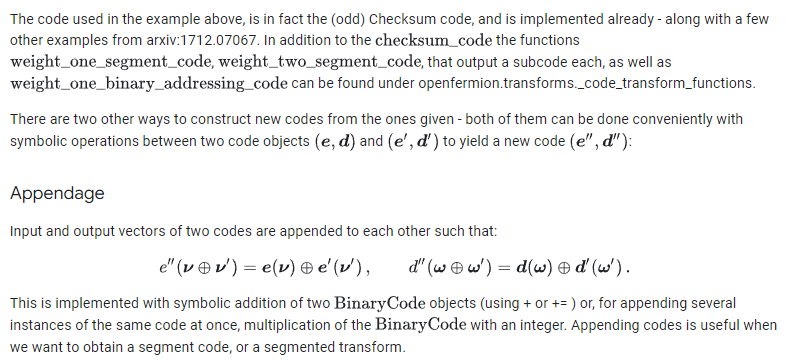

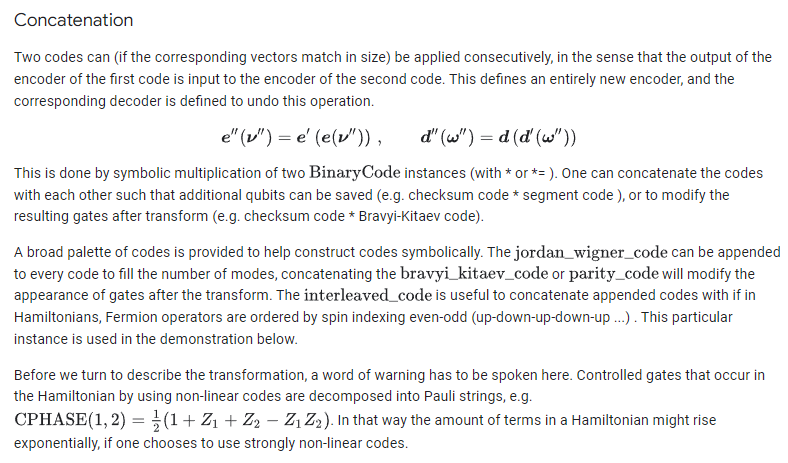

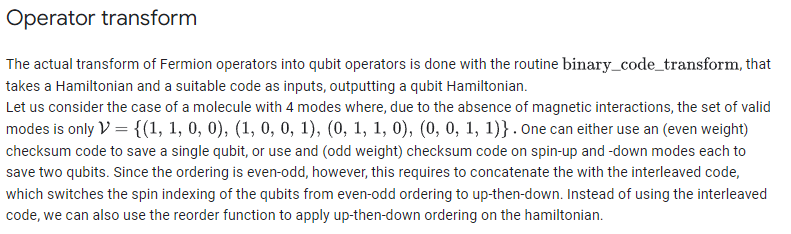

In [4]:
from openfermion.transforms import *
from openfermion.chem import MolecularData
from openfermion.transforms import binary_code_transform
from openfermion.transforms import get_fermion_operator
from openfermion.linalg import eigenspectrum
from openfermion.transforms import normal_ordered, reorder
from openfermion.utils import up_then_down

def LiH_hamiltonian():
    geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
    molecule = MolecularData(geometry, 'sto-3g', 1,
                             description="1.45")
    molecule.load()
    molecular_hamiltonian = molecule.get_molecular_hamiltonian(occupied_indices = [0], active_indices = [1,2])
    hamiltonian = normal_ordered(get_fermion_operator(molecular_hamiltonian))
    return hamiltonian

hamiltonian = LiH_hamiltonian()
print('Fermionic Hamiltonian')
print (hamiltonian)
print("The eigenspectrum")
print(eigenspectrum(hamiltonian))

print('\n-----\n')
jw = binary_code_transform(hamiltonian, jordan_wigner_code(4))
print('Jordan-Wigner transformed Hamiltonian')
print(jw)
print("the eigenspectrum of the transformed hamiltonian")
print(eigenspectrum(jw))

print('\n-----\n')
cksm_save_one = binary_code_transform(hamiltonian, checksum_code(4,0))
print('Even-weight checksum code')
print(cksm_save_one)
print("the eigenspectrum of the transformed hamiltonian")
print(eigenspectrum(cksm_save_one))

print('\n-----\n')
up_down_save_two = binary_code_transform(hamiltonian, interleaved_code(4)*(2*checksum_code(2,1)))
print('Double odd-weight checksum codes')
print(up_down_save_two )
print("the eigenspectrum of the transformed hamiltonian")
print(eigenspectrum(up_down_save_two ))

print('\n-----\n')
print('Instead of interleaving, we can apply up-then-down ordering using the reorder function:')
up_down_save_two = binary_code_transform(reorder(hamiltonian,up_then_down), 2*checksum_code(2,1))
print(up_down_save_two)
print("the eigenspectrum of the transformed hamiltonian")
print(eigenspectrum(up_down_save_two))

Fermionic Hamiltonian
-6.7698132180879735 [] +
-0.7952726864779313 [0^ 0] +
0.04614563473199314 [0^ 2] +
-0.4977908053255035 [1^ 0^ 1 0] +
-0.046145652803099894 [1^ 0^ 2 1] +
0.046145652803099894 [1^ 0^ 3 0] +
-0.011731985763800887 [1^ 0^ 3 2] +
-0.7952726864779313 [1^ 1] +
0.04614563473199314 [1^ 3] +
0.04614563473199324 [2^ 0] +
-0.21652178317319534 [2^ 0^ 2 0] +
-0.04614565280309991 [2^ 1^ 1 0] +
-0.22825376893699628 [2^ 1^ 2 1] +
0.011731985763800913 [2^ 1^ 3 0] +
0.005497504431583474 [2^ 1^ 3 2] +
-0.36549257026798354 [2^ 2] +
0.04614565280309991 [3^ 0^ 1 0] +
0.011731985763800913 [3^ 0^ 2 1] +
-0.22825376893699628 [3^ 0^ 3 0] +
-0.005497504431583474 [3^ 0^ 3 2] +
0.04614563473199324 [3^ 1] +
-0.21652178317319534 [3^ 1^ 3 1] +
-0.011731985763800917 [3^ 2^ 1 0] +
0.005497504431583467 [3^ 2^ 2 1] +
-0.005497504431583467 [3^ 2^ 3 0] +
-0.33918438174683924 [3^ 2^ 3 2] +
-0.36549257026798354 [3^ 3]
The eigenspectrum
[-7.86277316 -7.78339621 -7.78339621 -7.71405669 -7.71405669 -7.714056